In [2]:
import numpy as np
triangle_wf = []
a = np.linspace(0,1,10, endpoint=False) #end at 0.9
b= np.linspace(1,-1,20, endpoint=False) #ends at -0.9
c=np.linspace(-1, 0, 11) #ends at 0
triangle_wf = np.concatenate((a,b,c))


In [3]:
triangle_wf

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        0.9,  0.8,  0.7,  0.6,  0.5,  0.4,  0.3,  0.2,  0.1,  0. , -0.1,
       -0.2, -0.3, -0.4, -0.5, -0.6, -0.7, -0.8, -0.9, -1. , -0.9, -0.8,
       -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ])

In [4]:
len(triangle_wf)

41

In [5]:
import matplotlib.pyplot as plt

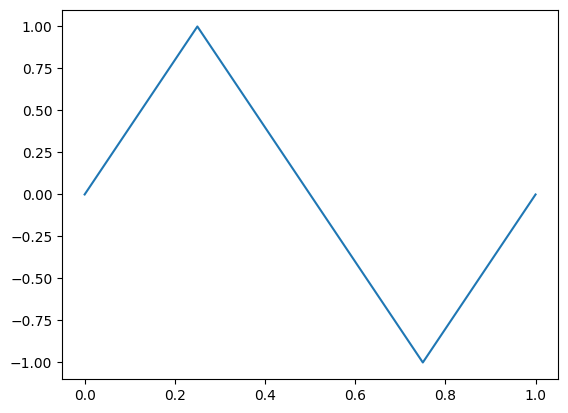

In [6]:
t = np.linspace(0,1, 41)
plt.plot(t, triangle_wf)

In [33]:
resolution = 10
up_pulse = np.concatenate((np.linspace(0,1,resolution, endpoint=False), np.linspace(1,0, resolution, endpoint=False)))
down_pulse = np.concatenate((np.linspace(0,-1,resolution, endpoint=False), np.linspace(-1,0, resolution+1)))

In [34]:
len(up_pulse)
#realistically its whatever I want plus 1? aka 2*resoltuion plus 1 how its coded, so lets say we have a 1.25 ratio 5/4 -> for my num of points
#therefore a good number would be 100 points is equal to 2*r => reolsution is 50
#therefore delay should be 80 points but then we have 100 vs 80 aka perfect
#take 125, take last 2 digits, so 25, subtract 125 - 125 get 100 for num points then do 125/ratio is the remaining points

20

In [39]:
#okay convert into fraction easiest way and have base reoslution of 10
ratio = 4.6667
ratio_after_cutoff = 4.66
#.331 as my ratio
ratio = 0.33#, then its just 33 vs 100 but you need to know to flip it


100.0

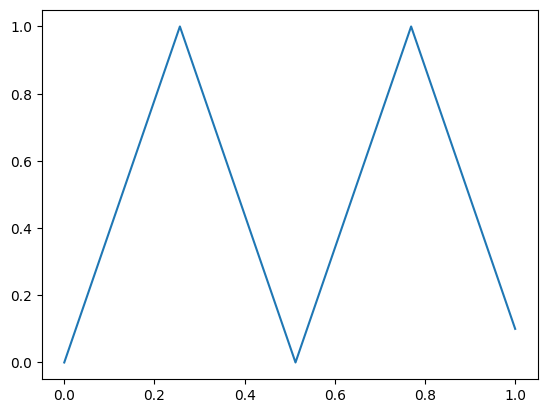

In [38]:
t1 = np.linspace(0,1,40)
up_pulse2 = np.concatenate((up_pulse,up_pulse))
plt.plot(t1, up_pulse2)

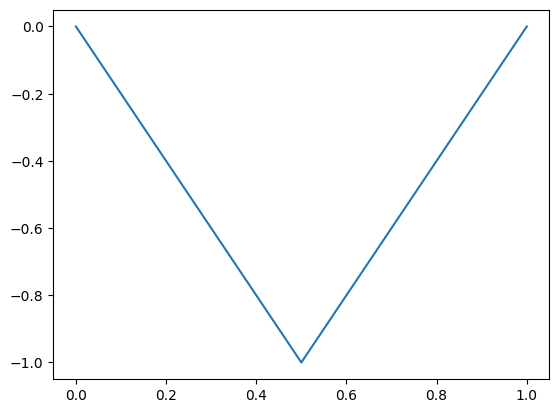

In [9]:
plt.plot(t1, down_pulse)

In [16]:
meow = 11.25


In [17]:
#convert to string and look for decimal point?

In [42]:
meow = 1166

test = str(meow)

index = test.find('.')
print(index)
num_of_decimal_points = len(test) - index - 1


-1


In [41]:
num_of_decimal_points
cutoff = 3
if num_of_decimal_points > cutoff:
    print("rounded to cut_off of {}".format(cutoff))

rounded to cut_off of 3


In [49]:
def create_DWM_wf(pulse_width, pulse_delay, cutoff=2, resolution=10):
    """
    Helper function that creates the PUND wf, can be later replaced by a read file if it is desired
    to have an external file hold the PUND wf and gives us the frequnecy
    Note if ratio of pulse_delay is not an integer it rounds to nearest CUTOFF decimal places in order to keep 
    file size low for transfering wf to 
    """

    pulse_width = float(pulse_width)
    pulse_delay = float(pulse_delay)

    #I dont even need the pulse width or delay lol, cuz oyu just configure it later lmao

    ratio = round(pulse_width/pulse_delay, cutoff)
    print(ratio)
    #check if ratio is within allowed cutoff
    ratio_str = str(ratio)
    zero_index = ratio_str.find('.')
    if zero_index!= -1:
        num_of_decimal_points = len(ratio_str) - zero_index - 1
    else:
        num_of_decimal_points = 0

    if num_of_decimal_points > cutoff:
        num_of_decimal_points = cutoff   
        print(" WARNING: Rounded to {} decimals for ratio of pulse_delay/pulse_width, frequnecy may be innacurate".format(cutoff))
    #lets make this program round to n decimals

    num_points_single_pulse = int(10*ratio*10**(num_of_decimal_points)) #need to be an int lol
    #calculata ratio correctly and sepeartely
    if pulse_delay < pulse_width:
        ratio = pulse_width/pulse_delay #5us and 1us delay we get ratio of 5, what if I do something like 5.5 what I could do is just round to nearest wahtever
        num_points_single_pulse = int(10*ratio*10**(num_of_decimal_points))
        num_points_delay = 10*10**(num_of_decimal_points) #base value
    else:
        ratio = pulse_delay/pulse_width 
        num_points_delay = int(2*ratio*10**(num_of_decimal_points)) #add two since we need integers for resolution
        num_points_single_pulse = 2*10**(num_of_decimal_points) #base value
    print(num_points_single_pulse)
    resolution = int(num_points_single_pulse/2)
    #first make original triangle part, lets say we want a range of 100 points for the triangle part so we can do 50 for each pulse not including delay
    a = np.linspace(0,1,resolution, endpoint=False) #end at 0.9
    b = np.linspace(1,-1,2*resolution, endpoint=False) #ends at -0.9
    c = np.linspace(-1, 0, resolution, endpoint=False) #doesnt include 0 at the end because thats more than a full cycle
    triangle_wf = np.concatenate((a,b,c))
    up_pulse = np.concatenate((np.linspace(0,1,resolution, endpoint=False), np.linspace(1,0, resolution, endpoint=False)))
    down_pulse = np.concatenate((np.linspace(0,-1,resolution, endpoint=False), np.linspace(-1,0, resolution, endpoint=False)))

    delay_arr = np.array([0] * num_points_delay)
    
    dwm_wf = np.concatenate((triangle_wf, delay_arr, up_pulse, delay_arr, up_pulse, delay_arr, down_pulse, delay_arr, down_pulse, delay_arr))
    '''
    ratio = int(pulse_delay/pulse_width) #this tells us how much longer the pulse width is careful cuz its rounding to nearest int btw
    delay_list = [0] * ratio
    pulse_1 = [-1, 0] + delay_list
    pulse_2 = [1, 0] + delay_list
    pulse_3 = [1, 0] + delay_list
    pulse_4 = [-1, 0] + delay_list
    pulse_5 = [-1, 0] + delay_list
    PUND_wf = pulse_1 + pulse_2 + pulse_3 + pulse_4 + pulse_5
    scale_factor = 5
    index = 0
    scaled_PUND_wf = PUND_wf[:]
    for i in range(len(PUND_wf)):
        value = PUND_wf[i]
        to_be_inserted = [value]*scale_factor 
        scaled_PUND_wf[index:index] = to_be_inserted
        index += 5
    scaled_PUND_wf = scaled_PUND_wf[:-len(PUND_wf)] #this removes original from the list

    total_wf_len = 10*(pulse_width) + 5*(pulse_delay) #see img for reasoning
    freq = 1/total_wf_len
    return scaled_PUND_wf, freq, total_wf_len'''
    return dwm_wf

In [50]:
my_dwm = create_DWM_wf('5e-6', '1e-6')

5.0
500


0.9


-0.1

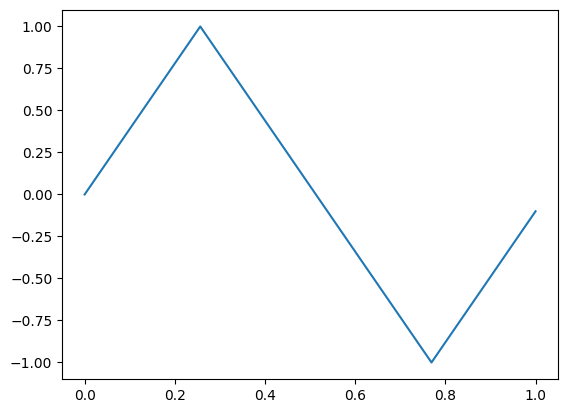

In [21]:
import numpy as np
triangle_wf = []
sampling_rate = 10
a = np.linspace(0,1,sampling_rate, endpoint=False) #end at 0.9
print(a[-1])
b= np.linspace(1,-1,2*sampling_rate, endpoint=False) #ends at -0.9
c=np.linspace(-1, 0, sampling_rate, endpoint=False) #ends at 0 so we need to remove last element
triangle_wf = np.round(np.concatenate((a,b,c)), decimals=3) #can round at the end after I make the entire array lol
t = np.linspace(0,1, 4*sampling_rate)
plt.plot(t, triangle_wf)
triangle_wf[-1]


In [ ]:
import numpy as np
pos_pulse = []
sampling_rate = 10
a = np.linspace(0,1,sampling_rate, endpoint=False) #end at 0.9
b=np.linspace(-1, 0, sampling_rate, endpoint=False) #doesnt end at 0
c = c[:-1] #remove last element
triangle_wf = np.concatenate((a,b,c))
t = np.linspace(0,1, 4*sampling_rate)
plt.plot(t, triangle_wf)
